# Multi-qubit quantum circuit
In this exercise we creates a two qubit circuit, with two qubits in superposition, and then measures the individual qubits, resulting in two coin toss results with the following possible outcomes with equal probability: $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$. This is like tossing two coins.


Import the required libraries, including the IBM Q library for working with IBM Q hardware.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.monitor import job_monitor

# Import visualization
from qiskit.visualization import plot_histogram, plot_bloch_multivector, iplot_bloch_multivector, plot_state_qsphere, iplot_state_qsphere

# Add the state vector calculation function
def get_psi(circuit, vis="B"): 
    global psi
    backend = Aer.get_backend('statevector_simulator') 
    psi = execute(circuit, backend).result().get_statevector(circuit)
    if vis=="Q":
        display(iplot_state_qsphere(psi))
    elif vis=="q":
        display(plot_state_qsphere(psi))
    elif vis=="M":
        print(psi)
    elif vis=="b":
        display(plot_state_qsphere(psi))
    else: # vis="B"
        display(iplot_bloch_multivector(psi))
        
    vis=""

How many qubits do we want to use. The notebook let's you set up multi-qubit circuits of various sizes. Keep in mind that the biggest publicly available IBM quantum computer is 14 qubits in size. 

In [2]:
#n_qubits=int(input("Enter number of qubits:"))
n_qubits=2

Create quantum circuit that includes the quantum register and the classic register. Then add a Hadamard (super position) gate to all the qubits. Add measurement gates.

In [3]:
qc1 = QuantumCircuit(n_qubits,n_qubits)
qc_measure = QuantumCircuit(n_qubits,n_qubits)
for qubit in range (0,n_qubits):
    qc1.h(qubit) #A Hadamard gate that creates a superposition
for qubit in range (0,n_qubits):
    qc_measure.measure(qubit,qubit)
print(qc1)

        ┌───┐
q_0: |0>┤ H ├
        ├───┤
q_1: |0>┤ H ├
        └───┘
 c_0: 0 ═════
             
 c_1: 0 ═════
             


Now that we have more than one qubit it is starting to become a bit difficult to visualize the outcomes when running the circuit. To alleviate this we can instead have the get_psi return the statevector itself by by calling it with the vis parameter set to `"M"`. We can also have it display a Qiskit-unique visualization called a Q Sphere by passing the parameter `"Q"` or `"q"`. Big Q returns an interactive Q-sphere, and little q a static one.

In [4]:
get_psi(qc1,"M")
print (abs(np.square(psi))) 
get_psi(qc1,"Q")

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
[0.25 0.25 0.25 0.25]


None

Now we see the statevector for multiple qubits, and can calculate the probabilities for the different outcomes by squaring the complex parameters in the vector.

The Q Sphere visualization provides the same informaton in a visual form, with |0..0> at the north pole, |1..1> at the bottom, and other combinations on latitude circles. In the dynamicc version, you can hover over the tips of the vectors to see the state, probability, and phase data. In the static version, the size of the vector tip represents the relative probability of getting that specific result, and the color represents the phase angle for that specific output. More on that later!

Now add your circuit with the measurement circuit and run a 1,000 shots to get statistics on the possible outcomes.
 

{'01': 268, '11': 235, '10': 253, '00': 244}


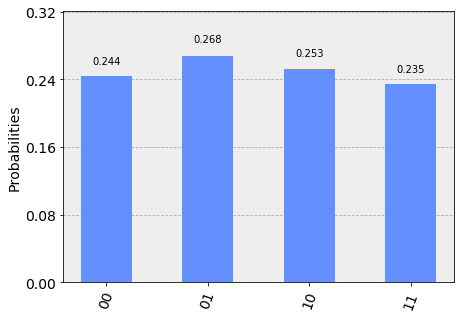

In [5]:
backend = Aer.get_backend('qasm_simulator')

qc_final=qc1+qc_measure

job = execute(qc_final, backend, shots=1000)
counts1  = job.result().get_counts(qc_final)
print(counts1)
plot_histogram(counts1)

As you might expect, with two independednt qubits ea h in a superposition, the resulting outcomes should be spread evenly accross th epossible outcomes, all the combinations of 0 and 1.

**Time for you to do some work!** To get an understanding of the probable outcomes and how these are displayed on the interactive (or static) Q Sphere, change the `n_qubits=2` value in the cell above, and run the cells again for a different number of qubits. 

When you are done, set the value back to 2, and continue on.


In [6]:
n_qubits=2

# Entangled-qubit quantum circuit - The Bell state

Now we are going to do something different. We will entangle the qubits.

Create quantum circuit that includes the quantum register and the classic register. Then add a Hadamard (super position) gate to the first qubit. Then add a controlled-NOT gate (cx) between the first and second qubit, entangling them. Add measurement gates. 

We then take a look at using the CX (Controlled-NOT) gate to entangle the two qubits in a so called Bell state. This surprisingly results in the following possible outcomes with equal probability: $|00\rangle$ and $|11\rangle$. Two entangled qubits do not at all behave like two tossed coins.

We then run the circuit a large number of times to see what the statistical behavior of the qubits are.
Finally, we run the circuit on real IBM Q hardware to see how real physical qubits behave.

In this exercise we introduce the CX gate, which creates entanglement between two qubits, by flipping the controlled qubit (q_1) if the controlling qubit (q_0) is 1.
```
        ┌───┐     
q_0: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_1: |0>─────┤ X ├
             └───┘
```

In [7]:
qc2 = QuantumCircuit(n_qubits,n_qubits)
qc2_measure = QuantumCircuit(n_qubits, n_qubits)
for qubit in range (0,n_qubits):
    qc2_measure.measure(qubit,qubit)

qc2.h(0) # A Hadamard gate that puts the first qubit in superposition
print(qc2)
get_psi(qc2)

        ┌───┐
q_0: |0>┤ H ├
        └───┘
q_1: |0>─────
             
 c_0: 0 ═════
             
 c_1: 0 ═════
             


None

In [8]:
for qubit in range (1,n_qubits):
    qc2.cx(0,qubit) #A controlled NOT gate that entangles the qubits.

print(qc2)
get_psi(qc2)

        ┌───┐     
q_0: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_1: |0>─────┤ X ├
             └───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════
                  


None

Now we notice something peculiar; after we add the CX gate, entangling the qubits the Bloch spheres display nonsense. Why is that? It turns out that once your qubits are entangled they can no longer be described individually, but only as a combined object. Let's take a look at the state vector and Q sphere.

In [9]:
get_psi(qc2,"M")

print (abs(np.square(psi)))

get_psi(qc2,"Q")

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
[0.5 0.  0.  0.5]


None

Set the backend to a local simulator. Then create a quantum job for the circuit, the selected backend, that runs just one shot to simulate a coin toss with two simultaneously tossed coins, then run the job. Display the result; either 0 for up (base) or 1 for down (excited) for each qubit. Display the result as a histogram. Either |00> or |11> with 100% probability.

{'00': 1}


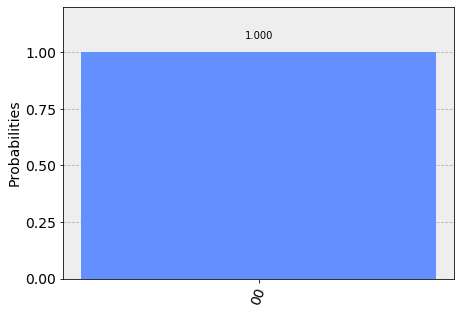

In [10]:
backend = Aer.get_backend('qasm_simulator')

qc2_final=qc2+qc2_measure

job = execute(qc2_final, backend, shots=1)
counts2  = job.result().get_counts(qc2_final)
print(counts2)
plot_histogram(counts2)

Note how the qubits completely agree. They are entangled.

**Do some work..** Run the cell above a few times to verify that you only get the results 00 or 11.

Now, lets run quite a few more shots, and display the statistsics for the two results. This time, as we are no longer just talking about two qubits, but the amassed results of thousands of runs on these qubits.

{'11': 523, '00': 477}


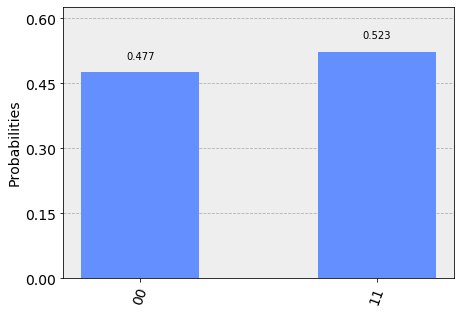

In [11]:
job = execute(qc2_final, backend, shots=1000)
result = job.result() 
counts  = result.get_counts()
print(counts)
plot_histogram(counts)

And look at that, we are back at our coin toss results, fifty-fifty. Every time one of the coins comes up heads (|0>) the other one follows suit. Tossing one coin we immediately know what the other one will come up as; the coins (qubits) are entangled.

# Run your entangled circuit on an IBM quantum computer
**Important:** With the simulator we get perfect results, only |00> or |11>. On a real NISQ (Noisy Intermediate Scale Quantum computer) we do not expect perfect results like this. Let's run the Bell state once more, but on an actual IBM Q quantum computer.

**Time for some work!** Before you can run your program on IBM Q you must load your API key. If you are running this notebook in an IBM Qx environment, your API key is already stored in the system, but if you are running on your own machine you [must first store the key](https://qiskit.org/documentation/install.html#access-ibm-q-systems).

In [12]:
#Save and store API key locally.
from qiskit import IBMQ
#IBMQ.save_account('MY_API_TOKEN') <- Uncomment this line if you need to store your API key

#Load account information 
IBMQ.load_account()
provider = IBMQ.get_provider()

Grab the least busy IBM Q backend.

In [13]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(operational=True, simulator=False))
#backend = provider.get_backend('ibmqx2')
print("Selected backend:",backend.status().backend_name)
print("Number of qubits(n_qubits):", backend.configuration().n_qubits)
print("Pending jobs:", backend.status().pending_jobs)

Selected backend: ibmqx2
Number of qubits(n_qubits): 5
Pending jobs: 0


Lets run a large number of shots, and display the statistsics for the two results: $|00\rangle$ and $|11\rangle$ on the real hardware. Monitor the job and display our place in the queue.

In [14]:
if n_qubits > backend.configuration().n_qubits:
    print("Your circuit contains too many qubits (",n_qubits,"). Start over!")
else:
    job = execute(qc2_final, backend, shots=1000)
    job_monitor(job)

Job Status: job has successfully run


Get the results, and display in a histogram. Notice how we no longer just get the perfect entangled results, but also a few results that include non-entangled qubit results. At this stage, quantum computers are not perfect calculating machines, but pretty noisy. 

{'01': 20, '11': 532, '10': 6, '00': 442}


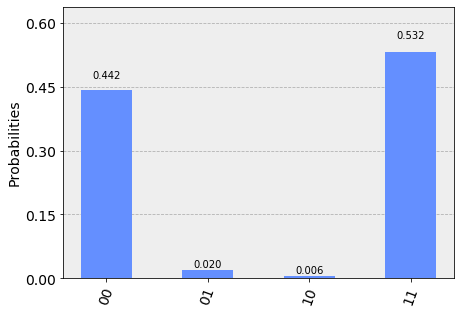

In [15]:
result = job.result()
counts  = result.get_counts(qc2_final)
print(counts)
plot_histogram(counts)

That was the simple readout. Let's take a look at the whole returned results:

In [16]:
print(result)

Result(backend_name='ibmqx2', backend_version='2.0.0', date=datetime.datetime(2019, 10, 26, 19, 27, 37, tzinfo=tzutc()), execution_id='a7e213c6-f826-11e9-b130-ac1f6b91f43c', header=Obj(backend_name='ibmqx2', backend_version='2.0.0'), job_id='5db49e1e736319001121ab8a', qobj_id='d0af7a9c-c9f4-49da-8e44-a6dd6b748699', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=442, 0x1=20, 0x2=6, 0x3=532)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=5, name='circuit12', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, memory=False, shots=1000, success=True)], status='Successful completion', success=True, time_taken=7.04504132270813)
